Introduction:
This notebook explores the Marketing Campaign Performance Dataset, which provides valuable insights into the effectiveness of various marketing campaigns. The dataset contains information about campaign types, target audience, duration, channels used, conversion rates, acquisition costs, ROI, locations, languages, clicks, impressions, engagement scores, customer segments, and dates.

The objective of this analysis is to uncover valuable insights regarding campaign performance, audience preferences, channel effectiveness, and ROI. By leveraging this dataset, marketers and data analysts can refine their marketing strategies, optimize campaigns, and drive targeted growth.

In [ ]:
#Let's begin the analysis by loading the dataset and performing some initial exploration.

In [ ]:
#Load libraries & data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings("ignore")
%matplotlib inline

In [7]:
df= pd.read_csv("/content/marketing_campaign_dataset.csv")

In [ ]:
#Basic Analysis

In [8]:
df.shape
df.columns
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23280 entries, 0 to 23279
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       23280 non-null  int64  
 1   Company           23280 non-null  object 
 2   Campaign_Type     23280 non-null  object 
 3   Target_Audience   23280 non-null  object 
 4   Duration          23279 non-null  object 
 5   Channel_Used      23279 non-null  object 
 6   Conversion_Rate   23279 non-null  float64
 7   Acquisition_Cost  23279 non-null  object 
 8   ROI               23279 non-null  float64
 9   Location          23279 non-null  object 
 10  Language          23279 non-null  object 
 11  Clicks            23279 non-null  float64
 12  Impressions       23279 non-null  float64
 13  Engagement_Score  23279 non-null  float64
 14  Customer_Segment  23279 non-null  object 
 15  Date              23279 non-null  object 
dtypes: float64(5), int64(1), object(10)
memo

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
23275,23276,DataTech Solutions,Influencer,Men 18-24,60 days,Email,0.09,"$17,035.00",4.70,Los Angeles,German,141.0,2916.0,8.0,Tech Enthusiasts,2021-10-08
23276,23277,Innovate Industries,Social Media,Women 35-44,45 days,Website,0.09,"$5,408.00",4.49,New York,Spanish,918.0,5917.0,7.0,Outdoor Adventurers,2021-10-09
23277,23278,NexGen Systems,Search,Women 35-44,45 days,Facebook,0.09,"$12,872.00",7.90,Los Angeles,French,614.0,6913.0,3.0,Foodies,2021-10-10
23278,23279,Alpha Innovations,Social Media,Women 25-34,60 days,YouTube,0.11,"$14,288.00",6.02,New York,French,869.0,3688.0,7.0,Foodies,2021-10-11
23279,23280,Alpha Innovations,Influencer,Wome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Data preparaton

In [9]:
# Remove dollar sign and commas from 'Acquisition_Cost' column and convert it to float
df['Acquisition_Cost'] = df['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype(float)

In [14]:
# Convert 'Duration' column to numeric by extracting the number of days
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

In [15]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# Check for any missing values
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

In [17]:
# Summary statistics
df.describe()

,Campaign_ID,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Date
count,23279.000000,23279.000000,23279.000000,23279.000000,23279.000000,23279.000000,23279.000000,23279.000000,23279
mean,11640.000000,37.470682,0.080316,12511.317797,4.998927,547.916577,5508.345075,5.514713,2021-07-01 12:08:30.331200256
min,1.000000,15.000000,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000,2021-01-01 00:00:00
25%,5820.500000,30.000000,0.050000,8750.000000,3.490000,324.000000,3247.000000,3.000000,2021-04-01 00:00:00
50%,11640.000000,30.000000,0.080000,12542.000000,5.000000,547.000000,5524.000000,6.000000,2021-07-01 00:00:00
75%,17459.500000,45.000000,0.120000,16246.500000,6.500000,775.000000,7774.500000,8.000000,2021-09-30 00:00:00
max,23279.000000,60.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000,2021-12-31 00:00:00
std,6720.212794,16.681562,0.040823,4335.951716,1.737549,260.222399,2604.040991,2.872350,NaN


In [18]:
# Unique values of 'Campaign_Type'
Company_types = df['Company'].unique()
print("Unique Campaign Types:", Company_types)

Unique Campaign Types: ['Innovate Industries' 'NexGen Systems' 'Alpha Innovations'
 'DataTech Solutions' 'TechCorp']


In [19]:
# Unique values of 'Campaign_Type'
campaign_types = df['Campaign_Type'].unique()
print("Unique Campaign Types:", campaign_types)

Unique Campaign Types: ['Email' 'Influencer' 'Display' 'Search' 'Social Media']


In [20]:
# Unique values of 'Target_Audience'
target_audiences = df['Target_Audience'].unique()
print("Unique Target Audiences:", target_audiences)

Unique Target Audiences: ['Men 18-24' 'Women 35-44' 'Men 25-34' 'All Ages' 'Women 25-34']


In [21]:
# Unique values of 'Channel_Used'
channels_used = df['Channel_Used'].unique()
print("Unique Channels Used:", channels_used)

Unique Channels Used: ['Google Ads' 'YouTube' 'Instagram' 'Website' 'Facebook' 'Email']


In [22]:
# Unique values of 'Language'
languages = df['Language'].unique()
print("Unique Languages:", languages)

Unique Languages: ['Spanish' 'German' 'French' 'Mandarin' 'English']


In [23]:
# Unique values of 'Customer_Segment'
customer_segments = df['Customer_Segment'].unique()
print("Unique Customer Segments:", customer_segments)

Unique Customer Segments: ['Health & Wellness' 'Fashionistas' 'Outdoor Adventurers' 'Foodies'
 'Tech Enthusiasts']


In [24]:
# Convert 'Campaign_Type' column to categorical
df['Company'] = df['Company'].astype('category')

# Convert 'Campaign_Type' column to categorical
df['Campaign_Type'] = df['Campaign_Type'].astype('category')


# Convert 'Target_Audience' column to categorical
df['Target_Audience'] = df['Target_Audience'].astype('category')

# Convert 'Channel_Used' column to categorical
df['Channel_Used'] = df['Channel_Used'].astype('category')

# Convert 'Language' column to categorical
df['Language'] = df['Language'].astype('category')

# Convert 'Customer_Segment' column to categorical
df['Customer_Segment'] = df['Customer_Segment'].astype('category')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23279 entries, 0 to 23278
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Campaign_ID       23279 non-null  int64         
 1   Company           23279 non-null  category      
 2   Campaign_Type     23279 non-null  category      
 3   Target_Audience   23279 non-null  category      
 4   Duration          23279 non-null  int64         
 5   Channel_Used      23279 non-null  category      
 6   Conversion_Rate   23279 non-null  float64       
 7   Acquisition_Cost  23279 non-null  float64       
 8   ROI               23279 non-null  float64       
 9   Location          23279 non-null  object        
 10  Language          23279 non-null  category      
 11  Clicks            23279 non-null  float64       
 12  Impressions       23279 non-null  float64       
 13  Engagement_Score  23279 non-null  float64       
 14  Customer_Segment  23279 non

As you can see, the columns Campaign_Type, Target_Audience, Channel_Used, Language, and Customer_Segment are now shown as the category data type in the DataFrame's information summary.

This conversion helps optimize memory usage and enables more efficient operations on categorical data.

In [ ]:
#EDA

Let's perform some exploratory data analysis (EDA) and create visualizations for the given dataset. Here's an example of how you can conduct EDA and create various plots using the datase

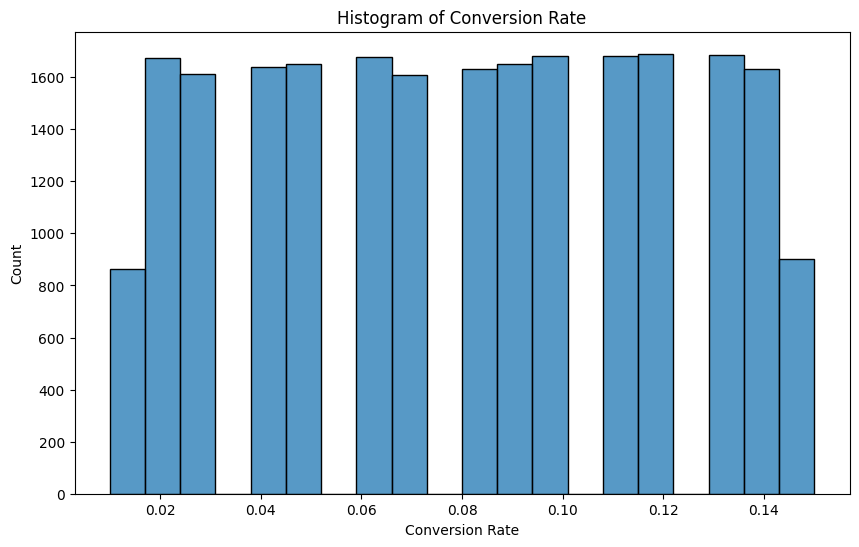

In [26]:
# Histogram of Conversion Rate
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Conversion_Rate', bins=20)
plt.title('Histogram of Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Count')
plt.show()

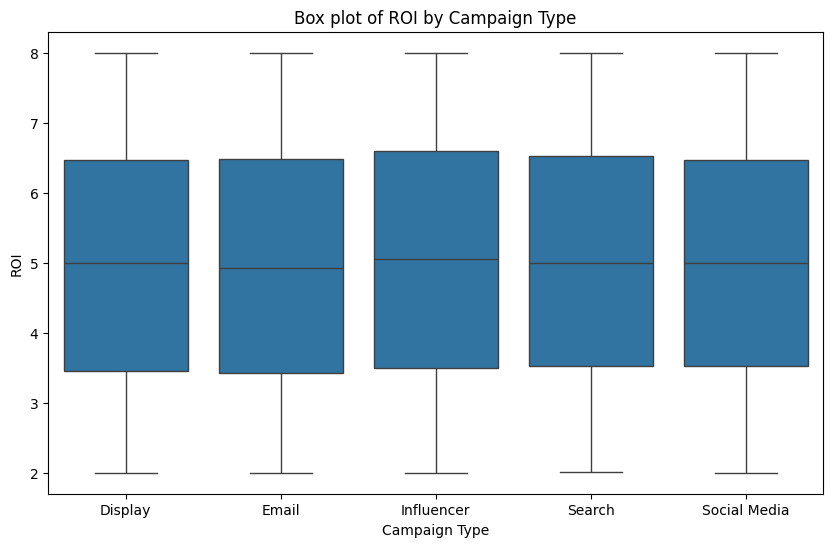

In [27]:
# Box plot of ROI by Campaign Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Campaign_Type', y='ROI')
plt.title('Box plot of ROI by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('ROI')
plt.show()

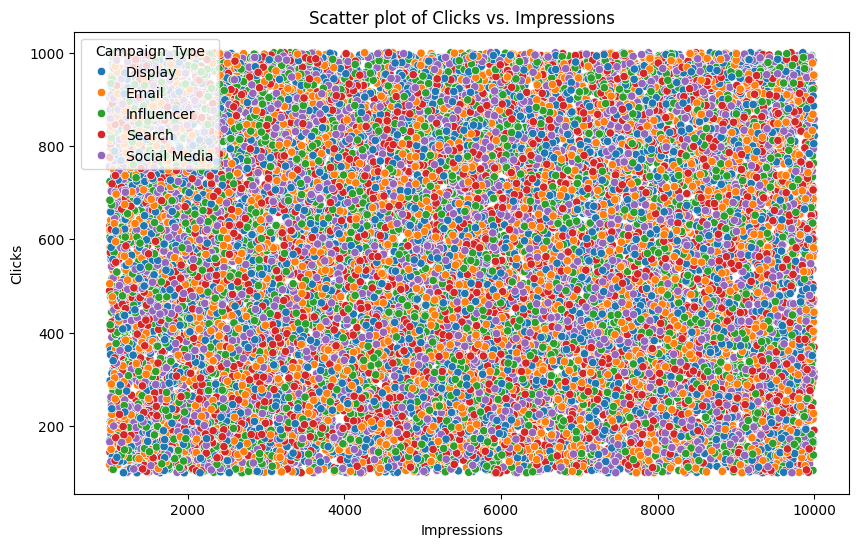

In [28]:
# Scatter plot of Clicks vs. Impressions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Impressions', y='Clicks', hue='Campaign_Type')
plt.title('Scatter plot of Clicks vs. Impressions')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.show()

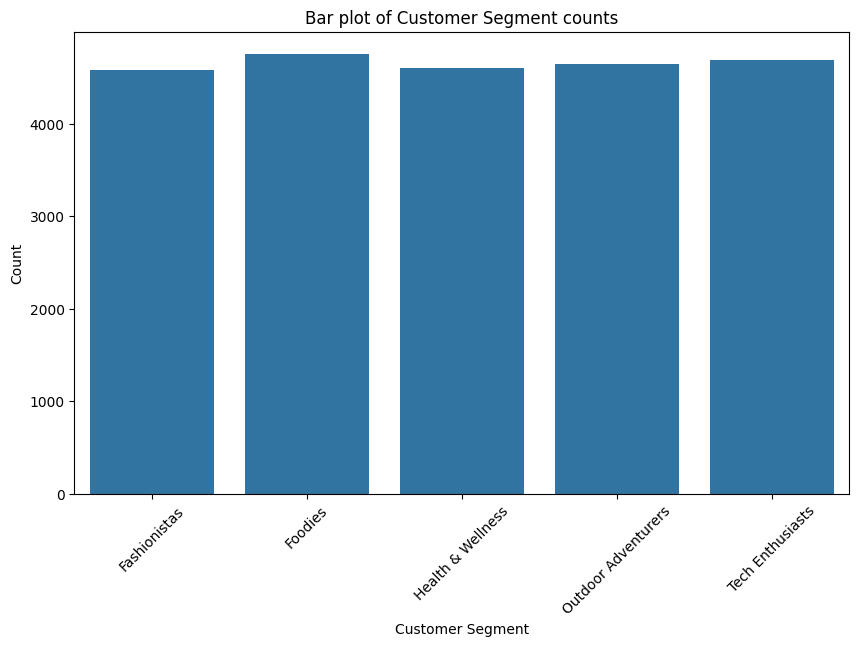

In [29]:
# Bar plot of Customer Segment counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer_Segment')
plt.title('Bar plot of Customer Segment counts')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

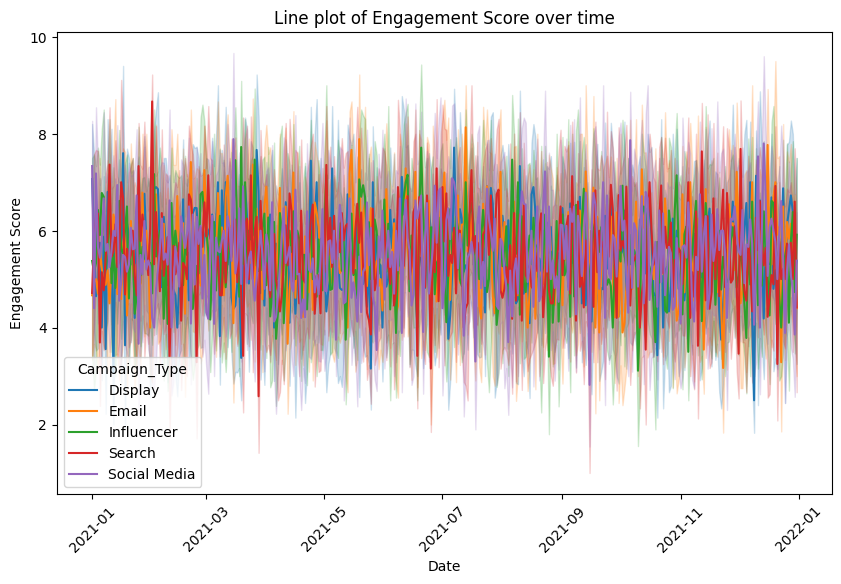

In [30]:
# Line plot of Engagement Score over time
df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values('Date')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x='Date', y='Engagement_Score', hue='Campaign_Type')
plt.title('Line plot of Engagement Score over time')
plt.xlabel('Date')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Geographical Distribution - Map Visualization

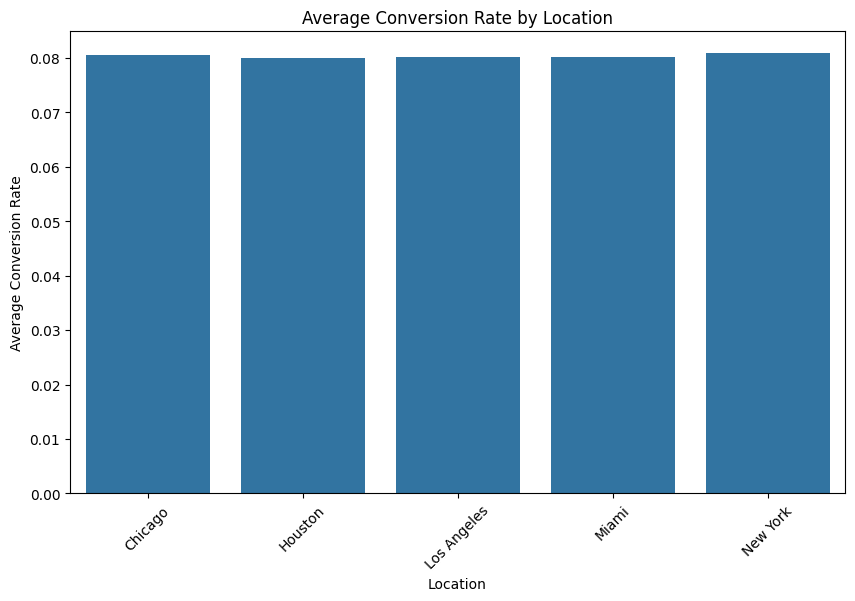

In [31]:
# Group data by location and calculate the average conversion rate
location_conversion = df.groupby('Location')['Conversion_Rate'].mean().reset_index()

# Create a map plot using the average conversion rate
plt.figure(figsize=(10, 6))
sns.barplot(data=location_conversion, x='Location', y='Conversion_Rate')
plt.title('Average Conversion Rate by Location')
plt.xlabel('Location')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Channel Usage - Pie Chart Visualization

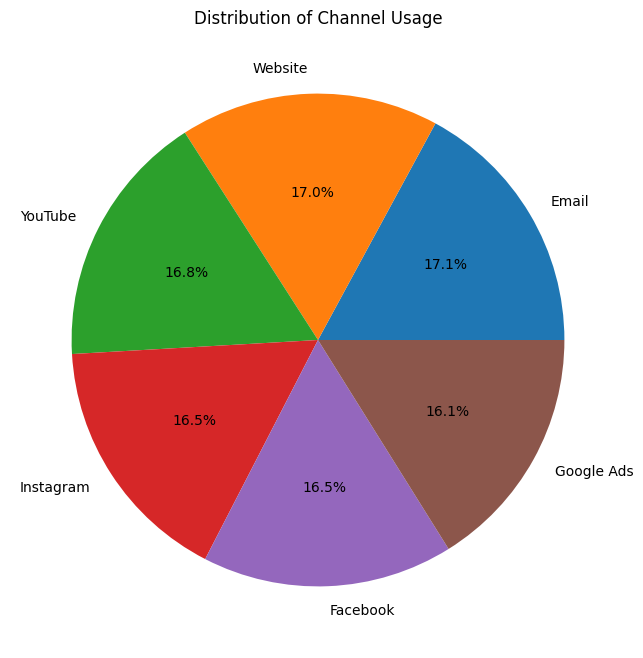

In [32]:
# Count the occurrences of each channel used
channel_counts = df['Channel_Used'].value_counts()

# Create a pie chart to visualize the distribution of channel usage
plt.figure(figsize=(8, 8))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Channel Usage')
plt.show()

In [ ]:
#Customer Segment Distribution - Stacked Bar Chart Visualization

<Figure size 1000x600 with 0 Axes>

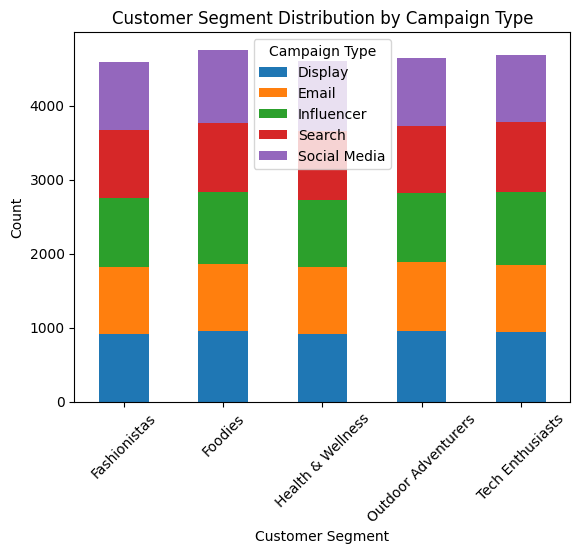

In [33]:
# Create a cross-tabulation of customer segments and campaign types
segment_campaign = pd.crosstab(df['Customer_Segment'], df['Campaign_Type'])

# Create a stacked bar chart to visualize the distribution of customer segments across campaign types
plt.figure(figsize=(10, 6))
segment_campaign.plot(kind='bar', stacked=True)
plt.title('Customer Segment Distribution by Campaign Type')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Campaign Type')
plt.show()

Conclusion:
In this analysis, we explored the Marketing Campaign Performance Dataset and gained valuable insights into the effectiveness of various marketing campaigns. Here are the key findings from the analysis:

Campaign Types: The dataset includes various campaign types such as email, social media, influencer, display, and search. Further analysis can be conducted to evaluate the performance of each campaign type and identify the most effective ones for different customer segments.

Target Audience: The dataset provides information about the specific audience segments targeted by the campaigns. Understanding the preferences and characteristics of different target audiences can help in tailoring marketing strategies to effectively engage and convert potential customers.

Channel Usage: The dataset includes information about the channels used to promote the campaigns, such as email, social media platforms, YouTube, websites, and Google Ads. Analyzing channel effectiveness can help in optimizing marketing efforts by focusing on the channels that generate higher conversion rates and engagement.

ROI and Acquisition Cost: The ROI (Return on Investment) and acquisition cost metrics provide insights into the profitability and cost-efficiency of the campaigns. By analyzing these metrics, marketers can identify the campaigns with the highest ROI and optimize their marketing budget allocation.

Customer Segments: The dataset categorizes campaigns based on specific customer segments such as tech enthusiasts, fashionistas, health and wellness enthusiasts, foodies, and outdoor adventurers. Understanding the preferences and behavior of different customer segments can aid in creating personalized and targeted marketing campaigns.

By leveraging the insights gained from this analysis, marketers and data analysts can refine their marketing strategies, optimize campaign performance, and drive targeted growth. The findings from this analysis can guide data-driven decision-making and support market research efforts.